# MARKETING EFFECTIVENESS - GRUPO 1

## Importación de las librerías

In [17]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Evaluation
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.grid_search import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

%matplotlib inline

## Carga de Datos

In [18]:
df_sample_submission=pd.read_csv('./sample_submission.csv')
df_test_novel=pd.read_csv('test_nolabel.csv')
df_train=pd.read_csv('train.csv')
df_train

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,44dc8df9,35,admin.,married,high.school,unknown,no,no,telephone,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
1,3f62aa06,52,technician,married,basic.9y,no,no,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
2,34bd6148,44,blue-collar,single,basic.9y,no,no,no,cellular,may,...,4,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1,0
3,e1671cba,35,admin.,married,high.school,no,yes,yes,telephone,jun,...,9,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,c20477f0,33,technician,married,university.degree,no,yes,no,cellular,jul,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
5,eb4b79fe,33,admin.,married,university.degree,no,yes,no,cellular,aug,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
6,2e6e8103,36,admin.,single,university.degree,no,yes,no,cellular,mar,...,2,999,4,failure,-1.8,93.369,-34.8,0.635,5008.7,0
7,c7eed135,34,blue-collar,single,high.school,no,yes,no,cellular,may,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,e31a6afd,41,blue-collar,married,basic.9y,no,no,no,telephone,jun,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
9,9f01dd44,51,technician,single,basic.9y,no,yes,no,telephone,nov,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


## Preprocesado de datos

In [19]:
df_train.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
df_test_novel['job'] = pd.get_dummies(df_test_novel['job'])
df_train['job'] = pd.get_dummies(df_train['job'])

df_test_novel['marital'] = pd.get_dummies(df_test_novel['marital'])
df_train['marital'] = pd.get_dummies(df_train['marital'])

df_test_novel['education'] = pd.get_dummies(df_test_novel['education'])
df_train['education'] = pd.get_dummies(df_train['education'])

df_test_novel['default'] = pd.get_dummies(df_test_novel['default'])
df_train['default'] = pd.get_dummies(df_train['default'])

df_test_novel['housing'] = pd.get_dummies(df_test_novel['housing'])
df_train['housing'] = pd.get_dummies(df_train['housing'])

df_test_novel['loan'] = pd.get_dummies(df_test_novel['loan'])
df_train['loan'] = pd.get_dummies(df_train['loan'])

df_test_novel['contact'] = pd.get_dummies(df_test_novel['contact'])
df_train['contact'] = pd.get_dummies(df_train['contact'])

df_test_novel['month'] = pd.get_dummies(df_test_novel['month'])
df_train['month'] = pd.get_dummies(df_train['month'])

df_test_novel['day_of_week'] = pd.get_dummies(df_test_novel['day_of_week'])
df_train['day_of_week'] = pd.get_dummies(df_train['day_of_week'])

df_test_novel['poutcome'] = pd.get_dummies(df_test_novel['poutcome'])
df_train['poutcome'] = pd.get_dummies(df_train['poutcome'])

In [21]:
features=[#'id',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

/Users/jgc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


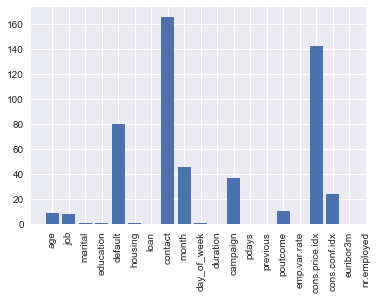

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_train[features].values
y = df_train['y'].values

kbest=SelectKBest(f_classif,k=6)
kbest.fit_transform(X, y)

scores = -np.log10(kbest.pvalues_)

plt.bar(range(len(features)), scores)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()

X_kbest = kbest.transform(df_train[features].values)
#print("X original shape: "+str(df_train[features].values.shape))
#print("X kbest shape: "+str(X_kbest.shape))

df_test_novel_transformed = kbest.transform(df_test_novel[features].values)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.25, random_state=33)


## DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Cross Val Score: "+str(cross_val_score(model, X_test, y_test)))
print("Model Score: "+str(model.score(X_test,y_test)))

Cross Val Score: [0.8872679  0.88527851 0.88822554]
Model Score: 0.8885818503371283


# Realizar predicción para Kaggle

In [34]:
#Realizar prediccion
#print("df_test_novel_transformed.shape: "+str(df_test_novel_transformed.shape))
#print("X_train.shape: "+str(X_train.shape))
#print("y_train.shape: "+str(y_train.shape))
#print("X_kbest.shape: "+str(X_kbest.shape))

predicted = model.predict(df_test_novel_transformed)
output = pd.DataFrame( data={"id":df_test_novel.id, "y":predicted} )
output_order = ['id','y']
output[output_order].to_csv('Labels.csv', index=False, quoting=3)

df_test_novel_transformed.shape: (5000, 6)
X_train.shape: (27141, 6)
y_train.shape: (27141,)
X_kbest.shape: (36188, 6)
